# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [50]:
import numpy as np
import pandas as pd
from pandasql import sqldf

In [51]:
#read the dataset here
Property_details = pd.read_csv("Property_details.csv") 
Property_details.head()

,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...


In [52]:
Order_details = pd.read_csv("Order_details.csv",encoding="ISO-8859-1") # dont know why I cannot read the csv directly but luckily it is solved by putting encoding
Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019


## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [53]:
Property_details.loc[Property_details.zipcode==84100,:].shape[0]

52

In [303]:
Property_details_84100=Property_details.loc[Property_details.zipcode==84100,:]

mean_starratings=Property_details_84100.starrating.mean()
standard_deviation_starratings=Property_details_84100.starrating.std()
median_starratings=Property_details_84100.starrating.median()
min_starratings=Property_details_84100.starrating.min()
max_starratings=Property_details_84100.starrating.max()

print("mean:",mean_starratings,"std:",standard_deviation_starratings,"median:",median_starratings,"min:",min_starratings,"max:",max_starratings)

mean: 2.8461538461538463 std: 0.7510676161988106 median: 3.0 min: 2 max: 4


 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [55]:
#(2a)
Order_details.dtypes

id                     int64
propertycode           int64
dtcollected           object
reservation date      object
los                    int64
guests                 int64
roomtype              object
onsiteprice          float64
ratedescription       object
ratetype              object
sourceurl             object
roomamenities         object
maxoccupancy           int64
ispromo               object
closed                object
discount             float64
promoname             object
proxyused             object
mealinclusiontype     object
hotelblock            object
input_dtcollected     object
dtype: object

In [58]:
# Convert reservation date to be a datetime and not a string
Order_details["reservation date"]=pd.to_datetime(Order_details["reservation date"])
Order_details.dtypes

id                            int64
propertycode                  int64
dtcollected                  object
reservation date     datetime64[ns]
los                           int64
guests                        int64
roomtype                     object
onsiteprice                 float64
ratedescription              object
ratetype                     object
sourceurl                    object
roomamenities                object
maxoccupancy                  int64
ispromo                      object
closed                       object
discount                    float64
promoname                    object
proxyused                    object
mealinclusiontype            object
hotelblock                   object
input_dtcollected            object
dtype: object

In [59]:
Order_details["weekday"]=Order_details["reservation date"].dt.day_name()
Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday
3,50650317,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday
4,50650318,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday


In [10]:
#(2b)
Order_details["weekday"].value_counts()
# Thursday receives the most reservation.

Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturday     20574
Name: weekday, dtype: int64

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [11]:
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
# You can deceide whether to display you output for 3(a) and 3(b) separately or together
count={}
new= Order_details['roomamenities'].apply(lambda x: str(x).split(';'))

for roomamenities in new:
    for i in roomamenities:
        a=i.strip(': ')
        if a in count:
            count[a]+=1
        else:
            if a !='':
                count[a]=0

sorted_a = sorted(count.items(), key=lambda x: x[1], reverse=True)

In [12]:
top=[sorted_a[i][0] for i in range(0,10)]
print("The top 10 common room amenities: ", top)

The top 10 common room amenities:  ['Air conditioning', 'In-room safe box', 'Free Wi-Fi in all rooms!', 'Hair dryer', 'Toiletries', 'Heating', 'Desk', 'Telephone', 'Closet', 'Towels']


In [13]:
last=[sorted_a[-11+i][0] for i in range(1,11)]
print("The least 10 common room amenities: ", last)

The least 10 common room amenities:  ['Wi-Fi [free]', 'In-room tablet', 'Air purifier', 'First aid kit', 'Internet access ï¿?LAN', 'TV [in bathroom]', 'Humidifier', 'Vending machine', 'Hot tub', 'Open air bath privileges']


In [14]:
# If you displayed your output of 3(b) together with 3(a) please delete this chunk
b={i[0]:i[1]/Order_details.shape[0] for i in sorted_a}
b

{'Air conditioning': 0.9709416240135526,
 'In-room safe box': 0.9709416240135526,
 'Free Wi-Fi in all rooms!': 0.9501968373394103,
 'Hair dryer': 0.767545049525842,
 'Toiletries': 0.723396815636059,
 'Heating': 0.7185919347934866,
 'Desk': 0.6908417885973004,
 'Telephone': 0.6862237977247654,
 'Closet': 0.6834566204264708,
 'Towels': 0.6403935541046464,
 'Satellite/cable channels': 0.6175990064688045,
 'Wake-up service': 0.544591343980033,
 'Coffee/tea maker': 0.47374195920975687,
 'Linens': 0.46732741314137927,
 'Smoke detector': 0.4400294200985091,
 'Carpeting': 0.429171715710212,
 'Ironing facilities': 0.41583621204174276,
 'Mini bar': 0.31153352263478684,
 'Clothes rack': 0.29843916731475284,
 'Free bottled water': 0.2666919872432524,
 'Soundproofing': 0.26648098243837154,
 'Seating area': 0.25571973738944853,
 'Mirror': 0.2426374394868363,
 'Alarm clock': 0.240877056543259,
 'Shower': 0.2199815521513447,
 'Daily housekeeping': 0.19699408583675462,
 'TV': 0.18449054397038697,
 'Ref

## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [186]:
#4(a)
Order_details['replaced_onsiteprice']=Order_details['onsiteprice']
medianprice=Order_details.loc[Order_details.onsiteprice !=0,:].groupby(by=['propertycode'])['onsiteprice'].median().reset_index()
medianprice.columns=['propertycode','median_price']

df=Order_details.merge(medianprice,how='inner',left_on='propertycode',right_on='propertycode')
df.loc[df['replaced_onsiteprice']==0.00,'replaced_onsiteprice']=df.loc[df['replaced_onsiteprice']==0.00,'median_price']

Order_details=df.drop('median_price',axis=1)
df1=sqldf('select id,onsiteprice,propertycode,replaced_onsiteprice from Order_details where onsiteprice=0 ')
df.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice,median_price
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36,107.7
1,50677498,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,107.70,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
2,50677499,634876,10/12/2019 15:46,2019-11-02,1,1,Deluxe Double Room with Shower,107.70,"Room size: 17 mÂ²/183 ftÂ², Shower, 1 queen be...",Extra low price! (non-refundable),...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
3,50731279,634876,10/12/2019 15:46,2019-11-02,1,1,Superior Double Room,107.70,"Room size: 17 mÂ²/183 ftÂ², Shower, 1 double bed",Cancellation policy,...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
4,63480999,634876,10/12/2019 18:52,2019-10-15,1,1,Standard Double or Twin Room,82.36,"Room size: 13 mÂ²/140 ftÂ², Shower, 1 queen be...",Extra low price! (non-refundable),...,N,6.24,NaN,media:M3diAproxy@107.158.217.250:80,Free Breakfast,NaN,10/13/2019,Tuesday,82.36,107.7


In [16]:
#4(b)
df2=sqldf('select propertycode,max(replaced_onsiteprice) as Maximum, min(replaced_onsiteprice) as Minimum from Order_details group by propertycode')
x_min=df2['Maximum'].min()
x_max=df2['Maximum'].max()
df2['Normalized Maximum']=(df2['Maximum']-x_min)/(x_max-x_min)
df2.head()

,propertycode,Maximum,Minimum,Normalized Maximum
0,31,374.73,219.52,0.020083
1,56,149.51,73.46,0.007620
2,97,468.83,259.76,0.025290
3,138,321.84,169.66,0.017156
4,147,226.18,122.90,0.011863


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [297]:
#5(a)

df_merge = Property_details.merge(Order_details, how = "inner", left_on = "propertyid", right_on = "propertycode")

df_merge = df_merge[df_merge["propertytype"] == "Hotels"]
df_merge = df_merge[df_merge["closed"] == "N"]
df_merge = df_merge[df_merge["hotelblock"] != "sold out"]
df_merge = df_merge[df_merge["maxoccupancy"] >= 3]

num_hotels = len(df_merge.propertyid.unique())
num_hotels

3085

In [300]:
df_merge

,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice
14,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,...,Y,N,6.42,NaN,media:M3diAproxy@209.242.219.235:80,Free breakfast for {3} Dinner,NaN,10/13/2019,Monday,132.10
15,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.235:80,Free breakfast for {3} Dinner,NaN,10/13/2019,Monday,146.78
17,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,...,Y,N,28.76,NaN,media:M3diAproxy@209.242.219.235:80,Free breakfast for {3},NaN,10/13/2019,Monday,100.56
19,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,...,Y,N,20.85,NaN,media:M3diAproxy@209.242.219.235:80,Free breakfast for {3},NaN,10/13/2019,Monday,111.73
23,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,...,Y,N,26.80,NaN,media:M3diAproxy@209.242.219.235:80,Free breakfast for {3},NaN,10/13/2019,Monday,112.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165739,71282,Berg-Spa & Hotel Zamangspitze,Nr. 227,Sankt Gallenkirch,Austria,6791.0,Hotels,4,47.021955,9.983504,...,Y,N,38.02,NaN,media:M3diAproxy@173.44.166.122:80,Free breakfast for {4},NaN,10/13/2019,Tuesday,150.69
165824,176055,Los Naranjos,"Avenida del Grao, 67 (antigua Pio XI)",Gandia,Spain,46700.0,Hotels,2,38.972066,-0.175100,...,N,N,0.00,NaN,media:M3diAproxy@173.44.165.45:80,Free breakfast for {3},NaN,10/13/2019,Thursday,48.23
165864,177028,"Marina Hotel - All Inclusive, Sunny Day Co.",Sunny Day Resort,St. St. Constantine and Helena,Bulgaria,9006.0,Hotels,4,43.242530,28.018227,...,Y,N,5.83,NaN,media:M3diAproxy@107.158.92.83:80,Free breakfast for {4},NaN,10/13/2019,Friday,310.44
165865,177028,"Marina Hotel - All Inclusive, Sunny Day Co.",Sunny Day Resort,St. St. Constantine and Helena,Bulgaria,9006.0,Hotels,4,43.242530,28.018227,...,N,N,0.00,NaN,media:M3diAproxy@107.158.92.83:80,Free breakfast for {4},NaN,10/13/2019,Friday,342.12


In [302]:
#5(b)
df3 = df2[df2["Maximum"]<=150]
df4 = df_merge.merge(df3, how = "inner", left_on = "propertyid", right_on = "propertycode")

num_hotels1 = len(df4.propertyid.unique())
num_hotels1

1372

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [262]:
#(a) 
df_country = df.merge(Property_details, how = 'inner', left_on = 'propertycode', right_on = 'propertyid')
df_country1 = df_country.groupby(by = ['country','propertyname']).agg({'replaced_onsiteprice':np.mean})


df_country1.reset_index(inplace = True)
df_expensive = df_country1.groupby(['country']).max() #The most expensive property in each country

df_expensive

,propertyname,replaced_onsiteprice
country,,
Austria,arte Hotel Salzburg,655.020000
Belgium,t Stadhuys Grote Markt,403.902979
Bulgaria,hotel-restaurant FORUM,1072.850000
Croatia,house Jadranovo,920.066216
Cyprus,The Prince Inn Hotel & Villas,304.798466
Czech Republic,Zdarsky hotel JEHLA,676.515714
Denmark,Zleep Hotel Aarhus Nord,288.985946
Estonia,ibis Tallinn Center,200.326364
Finland,Teatterihotelli Riihimaki,512.370000


In [272]:
df_a = df_expensive.merge(Property_details, how = "inner", on = "propertyname")

df_a.iloc[:,:7]

,propertyname,replaced_onsiteprice,propertyid,address,city,country,zipcode
0,arte Hotel Salzburg,655.020000,6536309,28 Rainerstrasse,Salzburg,Austria,5020.0
1,t Stadhuys Grote Markt,403.902979,808513,Grote Markt 50,Antwerp,Belgium,2000.0
2,hotel-restaurant FORUM,1072.850000,6992681,"ulitsa ""Hadzhi Dimitar Asenov""",Stara Zagora,Bulgaria,6000.0
3,house Jadranovo,920.066216,8965903,8 Obala,Jadranovo,Croatia,51264.0
4,The Prince Inn Hotel & Villas,304.798466,297017,kyrenia center kyrena,Girne,Cyprus,NaN
5,Zdarsky hotel JEHLA,676.515714,6630170,4 Kovarova,Zdar Nad Sazavou,Czech Republic,NaN
6,Zleep Hotel Aarhus Nord,288.985946,6629907,Tangen 45,Aarhus,Denmark,8200.0
7,ibis Tallinn Center,200.326364,7621602,Juhkentali 28,Tallinn,Estonia,10132.0
8,Teatterihotelli Riihimaki,512.370000,8521875,Hameenaukio 1,Hyvinkaa,Finland,11100.0
9,moorea camping,11367.060000,5746720,lieu dit mougnac,Minzac,France,24610.0


In [275]:
#(b) 
df_cheapest = df_country1.groupby(['country']).min() #The cheapest property in each country
df_cheapest

,propertyname,replaced_onsiteprice
country,,
Austria,AMEDIA Hotel Linz,12.060000
Belgium,3 Paardekens,54.589286
Bulgaria,A&M Hotel,18.826667
Croatia,Apartments Milic,41.282000
Cyprus,Achilleos Hotel,35.880769
Czech Republic,AMIGO CITY CENTRE HOTEL,14.800000
Denmark,AC Hotel Bella Sky Copenhagen,58.844000
Estonia,Kreutzwald Hotel Tallinn,84.365714
Finland,Best Western Hotel Carlton,51.378571


In [276]:
df_b = df_cheapest.merge(Property_details, how = "inner", on = "propertyname")

df_b.iloc[:,:7]

,propertyname,replaced_onsiteprice,propertyid,address,city,country,zipcode
0,AMEDIA Hotel Linz,12.060000,7229537,Prinz-Eugen-Strasse 12,Linz,Austria,4020.0
1,3 Paardekens,54.589286,4594100,Begijnenstraat,Mechelen,Belgium,2800.0
2,A&M Hotel,18.826667,8858390,"46 bulevard ""Hristo Botev""",Plovdiv,Bulgaria,4002.0
3,Apartments Milic,41.282000,382334,Novo Naselje 129,Gornji Karin,Croatia,23452.0
4,Achilleos Hotel,35.880769,112604,Mitsis Street,Larnaca,Cyprus,6530.0
5,AMIGO CITY CENTRE HOTEL,14.800000,112725,Legerova 13,Prague,Czech Republic,NaN
6,AC Hotel Bella Sky Copenhagen,58.844000,5059885,Center Boulevard 5,Copenhagen,Denmark,2300.0
7,Kreutzwald Hotel Tallinn,84.365714,6177,Endla 23,Tallinn,Estonia,10122.0
8,Best Western Hotel Carlton,51.378571,2615575,Kaisaniemenkatu 3,Helsinki,Finland,100.0
9,A La Villa des Artistes,33.150000,114043,9 Rue de la Grande Chaumiere,Paris,France,75006.0


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** The top 10 cities for winter holidays (christmas and the new year) trip (From Dec 21 to Jan 5)

**Question 2:** Are people more willing to go to cold or warm places (latitude < 45) during the winter holidays?

**Question 3:** which room type has the highest on site price?

**Question 4:** Which country is the most expensive one to live in a hotel?

**Question 5:** Which "weekday" used most promotions and has the highest discount?


In [149]:
#Your code to answer Question 1
import datetime
df_holiday = Order_details.merge(Property_details,how='inner',left_on='propertycode',right_on='propertyid')
df_holiday = df_holiday[(df_holiday["reservation date"].dt.month == 12) | (df_holiday["reservation date"].dt.month == 1)]
df_holiday = df_holiday[(df_holiday["reservation date"].dt.day >= 21) | (df_holiday["reservation date"].dt.day <= 5)]

cityRank = {}

for i in df_holiday['city']:
    if i in cityRank.keys():
        cityRank[i] += 1
    else:
        cityRank[i] = 1

cityRank = dict(sorted(cityRank.items(), key=lambda item: item[1], reverse = True))
city_list = list(cityRank.keys())
numReservationCity_list = list(cityRank.values())
city_list[:10] #Top 10 cities for travel during the winter holidays

['London',
 'Paris',
 'Rome',
 'Edinburgh',
 'Madrid',
 'Manchester',
 'Barcelona',
 'Tenerife',
 'Amsterdam',
 'Stuttgart']

[Text(0.5, 0, 'City Name'), Text(0, 0.5, 'Number of Reservation')]

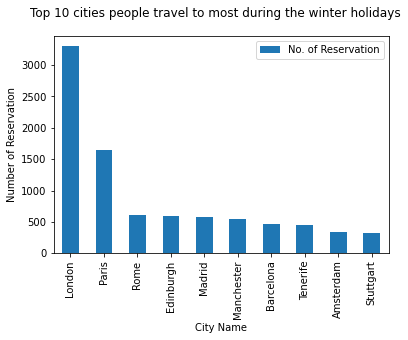

In [182]:
#Visualization of Question 1
dataframe_city = pd.DataFrame(numReservationCity_list[:10], index = city_list[:10], columns =['No. of Reservation'])

fig,ax=plt.subplots()
fig.suptitle("Top 10 cities people travel to most during the winter holidays")
dataframe_city.plot(kind='bar', ax=ax)
ax.set(xlabel="City Name",ylabel="Number of Reservation")

In [173]:
#Your code to answer Question 2
latitude = {}
for i in city_list:
    latitude[i] = Property_details.loc[Property_details['city'] == i, 'latitude']

city_latitude = {}
for i in city_list[:100]:
    city_latitude[i] = latitude[i].mean()

warm_num_reservation = 0
cold_num_reservation = 0
for i in city_list[:100]:
    if city_latitude[i] < 45:
        warm_num_reservation += cityRank[i]
    else:
        cold_num_reservation += cityRank[i]

print('Number of reservations in warm and cold places:', warm_num_reservation, 'and', cold_num_reservation)


Number of reservations in warm and cold places: 4584 and 14346


Text(0.5, 1.0, 'Number of Reservations')

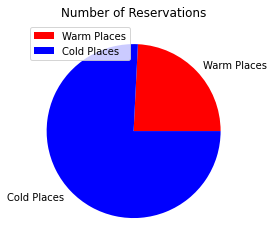

In [170]:
#Visualization for question 2:
import matplotlib.pyplot as plt

y = np.array([warm_num_reservation, cold_num_reservation])
labels = ["Warm Places", "Cold Places"]
colors = ['r', 'b']
plt.pie(y, labels = labels, colors = colors)
plt.legend()
plt.title('Number of Reservations')

[Text(0.5, 0, 'property type'), Text(0, 0.5, 'Average Price')]

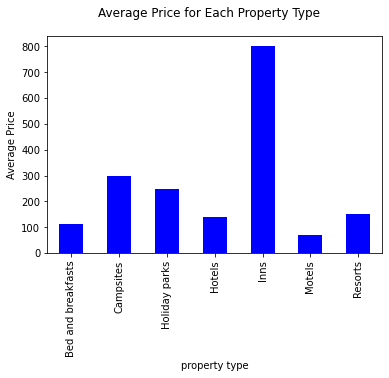

In [277]:
# Your code to answer Question 3
df_details=Order_details.merge(Property_details,how='inner',left_on='propertycode',right_on='propertyid')
average_price = df_details.groupby(['propertytype']).mean()['onsiteprice']

fig,ax=plt.subplots()
fig.suptitle("Average Price for Each Property Type")
average_price.plot(kind='bar', ax=ax,color ='b')
ax.set(xlabel="property type",ylabel="Average Price")

# Inns have the highest average type.

In [20]:
# Your code to answer Question 4
# Merge two tables
df_price=Property_details.merge(Order_details,how="inner",left_on="propertyid",right_on="propertycode")
df_price=df_price.loc[:,["propertyid","city","country","onsiteprice"]]
df_price

,propertyid,city,country,onsiteprice
0,177234,Crete Island,Greece,59.59
1,177234,Crete Island,Greece,49.08
2,177234,Crete Island,Greece,54.53
3,177234,Crete Island,Greece,59.59
4,177234,Crete Island,Greece,61.33
...,...,...,...,...
165868,177162,Sunny Beach,Bulgaria,72.60
165869,177162,Sunny Beach,Bulgaria,82.28
165870,177162,Sunny Beach,Bulgaria,78.41
165871,177162,Sunny Beach,Bulgaria,91.96


In [21]:
# Find the most expensive country to live in a hotel
df_price_country=df_price.groupby(by=["country"])["onsiteprice"].mean()
df_price_country=df_price_country.reset_index().sort_values("onsiteprice",ascending=False)
df_price_country_top=df_price_country.head(10)
df_price_country_top
# Croatia is the most expensive country to live in a hotel.

,country,onsiteprice
3,Croatia,211.127469
17,Luxembourg,189.270400
6,Denmark,161.853902
4,Cyprus,161.816976
19,Netherlands,156.933513
27,Switzerland,155.353313
0,Austria,152.790712
8,Finland,150.696205
1,Belgium,147.037857
28,United Kingdom,143.930067


[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Onsiteprice')]

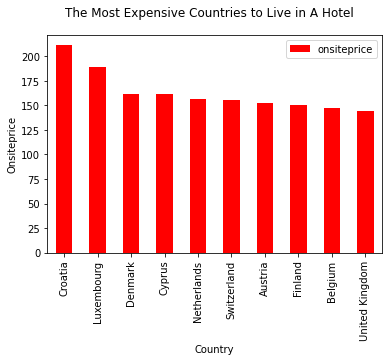

In [22]:
# Question 4 Visualization
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.suptitle("The Most Expensive Countries to Live in A Hotel")

df_price_country_top.plot(kind="bar",x="country",y="onsiteprice",color="r",ax=ax)
ax.set(xlabel="Country",ylabel="Onsiteprice")

In [24]:
# Your code to answer Question 5
df_promotion=Order_details.loc[(Order_details["ispromo"]=="Y")]
df_promotion=df_promotion.groupby(by=["weekday"])["ispromo"].value_counts()
df_promotion
# Monday used most promotions.

weekday    ispromo
Friday     Y           7929
Monday     Y          10328
Saturday   Y           8254
Sunday     Y          10006
Thursday   Y          10318
Tuesday    Y           9427
Wednesday  Y           9400
Name: ispromo, dtype: int64

In [23]:
df_discount=Order_details.groupby(by=["weekday"])["discount"].mean()
df_discount=df_discount.reset_index().sort_values("discount",ascending=False)
df_discount
# Sunday has the highest discount.

,weekday,discount
3,Sunday,17.335634
0,Friday,14.167739
4,Thursday,13.929995
1,Monday,13.575157
2,Saturday,13.150235
6,Wednesday,12.986721
5,Tuesday,12.712534


[Text(0.5, 0, 'Weekday'), Text(0, 0.5, 'Discount')]

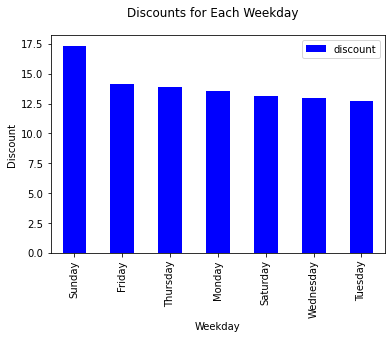

In [25]:
# Question 5 Visualization
fig,ax=plt.subplots()
fig.suptitle("Discounts for Each Weekday")

df_discount.plot(kind="bar",x="weekday",y="discount",color="b",ax=ax)
ax.set(xlabel="Weekday",ylabel="Discount")

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


As the winter holidays - christmas and the new year - are coming, we are interested in discovering what information this data set can represent for companies to improve marketing positioning and strategies.

The first interesting observation we have found is that London is the most popular city during winter holidays, with Paris being at 2nd also far ahead of the rest of the pack. This is likely because of their economic development and their popularity as a tourism city. So London and Paris are the main target when we are doing marketing for hotels.

In the top 100 travel destinations (cities), we are curious whether people would love to go to warm places to escape the winter, or to cold places to enjoy the real winter holiday vibe. We found that travelers are more willing to travel to colder places than warmer places. This is likely because many countries in the database lie in the northern half of the northern hemisphere; this may include UK, France, Germany, and Scotland. These countries possess the most travelers, who are likely to travel domestically and be the most popular travel destinations. We can consider promote more cities in the colder places to create a better christmas/new year vibe for travelers. An alternative can be promoting more attractions in the warm places, in order to let travelers be more aware of these destinations.

With the above findings held, now we want to discover the prices across all types of hotel rooms. The highest average price is Inns, followed by Campsites and Holiday Parks. Aside from Inns, the rest of the property types have no significant differences in average price. However, Inns have by far the highest average price.

And then, we found countries that are the most expensive to live in. Surprisingly, the most expensive countries are not UK or France, but rather countries like Croatia, Luxemburg, Denmark. We conclude that this is probably that, even though these countries do not rank high in overall economic development, they are all among the world’s top per-capita metrics. For example, Luxemburg ranks 2nd in the world, 1st in Europe in per capita income.

Finally, we compared the number of discounts on each day of the week. We found out that Sundays provide the most value. We believe this is because people usually have vacations during the weekends, and hotels are trying to lure the most customers during the weekends, as Friday follows Sunday to be placed on number 2.

PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!